# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations and Criteria
- You are expected to detail your decisions & thinking in comments
- You may use any language you like (although the examples given below are using Python)
- Avoid using too many libraries that would do too much of the work for you. For example, in Python a good approach would be to use only functions from `numpy` (together with in-built libs if needed)
- Try and make your code as efficient as possible. Feel free to deviate from a literal interpretation of the instructions given under the **Training** heading above in the interest of code efficiency
- Consider the best way to structure your code and code base for later use by other developers or in anticipation of productionisation (you don't need to use Jupyter Notebook if it doesn't fit)
- Include any tests you may have used (tests not required however)
- Package your code into a docker image with a `Dockerfile`
- Discuss your approach and process to productionise this application
- You can use code below to generate the trainig data of 10 colours:

---

---

## 1. Response

#### Project Packaging & Structure


<div style='color:#FF4500;'>

- ```numpy``` is used as primary library to hold and manipluate data.
- ```fastAPI``` is used to package the application and expose ```/train/```, ```/atrain/```, ```/list-of-models/```, ```/download/```, ```/predict/``` endpoints. ```fastAPI``` was chosen due to its high performance and auto tuned for number of CPU cores for handling high request load.
- The solution is packaged as a production ready server application & containerised. The solution files reside under ```app/``` folder:    
    - `kohonen.py` : <i>file contains ```Kohonen``` that implements the algorithm.</i>
    - `main.py` : <i>file act as entry point for ```fastAPI```, where all REST API requests will fall.</i>
    - `settings.py` : <i>file contain settings, contant values etc used in the project.</i>
    - `utils/utils.py` : <i>file contains helper methods that are used in the project.</i>
    - `saved_models/` : <i>folder which (can) contain saved models (weights) post training. Ideally, models/weights could be saved on a blob storage for better scalablity.</i>
        - <i>There are already saved grids/model files (.npy) under following names/configurations:</i> 
            - ```10X10 100N```
            - ```10X10 200N```
            - ```10X10 500N```
            - ```100X100 1000N```
    - `exceptions.py` : <i>file implementing kohonen algorithm exceptions.</i>
    - `logs/logging.log` : <i>file contains logs that are captured throughout the appplication.</i>
    - `api_params` : <i> file contains multiple classes that are responsible for parsing ```fastAPI``` requests (body parameters).</i>
    - `app/test.py` : <i> Please look for <a href='app/test.py'>test.py</a> file for triggering tests. Uncomment lines, to run via command line ```python test.py```</i>
    - `saved_plots/` : <i>folder to save any plot images (used in test.py) for analysis/code-testing purposes</i>
    - `saved_train_inputs/` : <i>folder to save any training data (used in test.py) as .npy file for analysis/code-testing purposes</i>
    - `configs/`  : <i>folder contains python package requiements files.</i>
        - ```prod.requirements.text``` is used to install requirements when packaging, containerising.
        - ```requirements.text``` has to be used to create local envrionment for running, testing the application via command line, jupyter lab etc.
            - (Core Libs)
                - ```! pip install  numpy==1.20.1```
                - ```! pip install  matplotlib==3.3.4```
            -  (Packaging/Productioning Libs)
                - ```! pip install fastapi==0.63.0```
                - ```! pip install aiofiles==0.6.0```
                - ```! pip install uvicorn==0.13.4```
            -   (For making HTTP requests to running application)
                - ```! pip install requests==2.25.1```
    - `Dockerfile` : <i>to package this project as REST API</i>
        - This is based on ```tiangolo/uvicorn-gunicorn-fastapi:latest``` image which has ```python==3.8.6``` preinstalled.
</div>

---

# Application Packaging

<label style='color:#FF4500;'> There are many ways to productionise a machine learning model. Here, I have approached it as a dedicated server (depends on usage and consumption scenarios) using light-weight high performant ```fastAPI``` framework containerised using ```Docker```. Model can also be deployed as ```Cloud function``` for minimising cost.</label>

<label style='color:#FF4500;'>Further, the current deployment strategy allows to synchronously as well asynchronously train the model. Async, one can send/submit a traning job to sever, which in response sends a operation-location. This operation-location can be later accessed to retrive model's weights in form of ```.npy``` file. This means one do not wait for the response of your ```train``` request to server. Opposite to that, using synchronous endpoint, you have to wait till server returns the response, thus making it suitable for smaller grid resolution. You will see this is the approach I have taken in demonstrating the use of application seamlessly working with smaller and larger grid resolutions. You will notice that smaller grids such as `10x10` are run `Synchronously` whereas the `100x100` grid is demonstrated using `Asynchronous` approach.
</label>

# Navigating this notebook

This notebook is created to demonstrate the Application Packaging strategy along with show the training results. The following is repeated for all different endpoints of application.
- Consuming Endpoint Examples
    - endpoint name
    - method / cell demonstrating the use of endpoint
    - result from calling the endpoint

This section examplifies saved models already packaged within the docker image.
- Sample Examples
    - 10x10 100N
    - 10X10 200N
    - 10X10 500N
    - 100X100 1000N

---

Build/Running containised (on 8000/your choice port):
-----------------------------------------------------
1. ```docker build . -t kohonen``` (assuming your current directory is this project's directory)
2. ```docker run -d --name kohonen -p 8000:80  kohonen:latest```

---

Running from source code:
------------------------

#### As local server:
1. ```cd app/```
2. ```uvicorn main:app``` (default port is 8000)

#### As local via python file:
- Look for ```app/test.py``` <a href='app/test.py'>test.py</a>  file
- It has sample tests written for running the network over following configurations:
    1. 10X10 for 100N
    2. 10X10 for 200N
    3. 10X10 for 500N
    4. 100X100 for 1000N

----

Productioning approach as REST Service
---------------------

<h2 style='color:#FF4500;'>Using '/atrain/'</h2>

Recommended way is to perform training by performing a POST request at ```/atrain/``` with payload as following:
```
payload = {
    "grid_shape" : [10, 10],
    "max_iterations" : 100,
    "learning_rate" : 0.1,
    "training_data" : input_sample.tolist(),
    "training_data_shape" : input_sample.shape
    }
```

```input_sample``` is ```numpy.array``` what you want to project over grid of shape ```grid_shape``` for dimentiality reduction.

The response of that would be a json object that would contain a key called ```operation-location```. The value of that is a unique identifier (or ```model_name```) to name your training job.

Once the training has completed, you would be able to download ```model_name``` file (model_name.npy) by performing a GET request at ```/download/{model_name}``` and getting status code of 200 i.e. the model has been trained and saved under ```model_name``` name. The downloaded ```.npy``` file can be therefore consumed for analysis, plotting etc.
<label style='color:#FF4500;'>Using ```/atrain/``` is ideal especially when training on over large grids (order of size 100X100 or higher)</label>


<h2 style='color:#FF4500;'> Using '/train/' </h2>

This is a synchronous way to send a training request and receiving response ONLY after model is trained and saved. The response will be same as of ```/atrain/``` containing ```operation-location``` key and value as trained model's unique identifier. Further you can follow same process to download it and consume it.


<h2 style='color:#FF4500;'> Using '/list-of-models/' </h2>

Allows you to get list of all preexisting trained model.


<h2 style='color:#FF4500;'>Using '/predict/'</h2>

Allows to map test input vector to gird nodes i.e. which test input color is closest to which node in the grid. Returns list of `x`, `y` coordinates of grid nodes which can be plotted over grid for visualising & labelling test input using a trained model.


<h2 style='color:#FF4500;'>Using '/download/{model_name}/'</h2>

This is useful endpoint which works in conjuction with ```/train``` and ```/atrain/``` api to get the trained model file. Additionally, we can build a UI that can facilitate model visualisation post training. I have not gone to the extend of building the UI to visualise the trained grid, however it can be a consumer facing application for clustering high dimentional data such as geographical data etc.

----

Saving Trained Model
---------------------
All trained models are saved using unique identifier of format ```{d-m-Y_HhMmSs}T_{grid_x}X{grid_y}_{max_iterations}N_{learning_rate}LR``` and as ```.npy``` file under ```saved_models``` folder.
For example: ```05-03-2021_23h35m57sT_10X10_500N_0.1LR``` indicates that the model training started at `05th` of `March` `2021` at `23hrs` `35mins` `57seconds` (UTC) on grid of size `10X10` for `500` iterations and initial learning rate of `0.1`

---
---

# Application Endpoints

#### Installing required packages

In [1]:
# Core Libs
# ! pip install  numpy==1.20.1
# ! pip install  matplotlib==3.3.4

# Package Libs
# ! pip install fastapi==0.63.0
# ! pip install aiofiles==0.6.0
# ! pip install uvicorn==0.13.4

# For making HTTP requests to running applicaiton
# ! pip install requests==2.25.1

In [2]:
# OR via requirements file
# 1. cd ```configs/```
# 2. run pip install -r prod.requirements.txt

In [1]:
import requests as req
import numpy as np
import matplotlib.pyplot as plt
import json

### Input Data of Shape (10,3)

In [2]:
shape = (10,3)

# Sample Data
data_sample = np.array(
        [[0.09803922, 0.78823529, 0.27058824],
       [0.17254902, 0.8745098 , 0.18823529],
       [0.82352941, 0.6       , 0.49411765],
       [0.83529412, 0.56078431, 0.65098039],
       [0.85098039, 0.74509804, 0.54509804],
       [0.06666667, 0.3254902 , 0.63529412],
       [0.1254902 , 0.56470588, 0.09411765],
       [0.82352941, 0.00392157, 0.61176471],
       [0.91764706, 0.85882353, 0.70980392],
       [0.38039216, 0.68627451, 0.70980392]]
)

# Random Data
# data_sample = np.random.randint(0, 255, size=(shape[0], shape[1])) / 255.0

In [3]:
def scatter_input_data(input_data):
    """
    Helper method to scatter list of 3D colors.
    """
    _total = len(input_data)
    x = range(_total),
    y = np.ones(_total)
    plt.scatter(x,y, c=input_data, s=100)

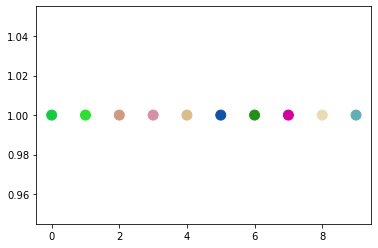

In [4]:
scatter_input_data(data_sample)

In [95]:
# Saves training input data
# np.save("temp/data_sample.npy", data_sample)

Above uses ```temp/``` folder to save training sample

---
---

# Consuming Endpoints (Examples)

In [5]:
port = 8000 # Set your port here, if you are running Docker or Uvicorn on different port
# endpoint = f"http://localhost:{port}" # Docker
endpoint = f"http://127.0.0.1:{port}" # Uvicorn

## GET /download/{model_name}/ : Download trained model
This is useful endpoint which works in conjuction with ```/train``` and ```/atrain/``` api to get the trained model.
Additionally, we can build a UI that can facilitate model visualisation post training. I have not gone to the extend of building the UI to visualise the trained grid, however it can be a consumer facing application for clustering high dimentional data such as geographical data etc.

#### Save downloaded model and view grid
This will examplfied later when consuming ```/train/``` and ```/atrain/```

In [6]:
def download(model_name:str)->bytes:
    """
    Examplifies how to download a model (weights) via name.
    Do not use .npy extension in the name.
    
    Parameters
    ----------
    model_name : str
        name of model / operation-location returned by /train/, /atrain/ 
    
    Returns
    -------
    file bytes : bytes
        Downloads the model file (.npy)
    
    Example
    --------
        model_name = '10x10 100N' instead of '10x10 100N.npy'
        file_bytes = download("10x10 100N")
    
    """
    download_endpoint = f"{endpoint}/download/{model_name}/"
    try:
        response = req.get(url=download_endpoint)
        if response.status_code == 200:
            return response.content
    except:
        print("Could not download model file. Response content: ", response.content)
    print(f"Status code: {response.status_code}")
    return None

In [7]:
def load_weights(file_bytes):
    """
    Helper method to save the downloaded model file bytes
    into a temporary sample .npy file at 'temp/' folder
    
    Parameters
    ----------
    file_bytes : bytes
        file bytes of model wieghts downloaded using 'def download' above.
        
    Returns
    -------
    weights : numpy.array 
    
    """
    temp_path = "temp/sample_weights.npy"
    with open(temp_path, 'wb') as f:
        f.write(file_bytes)
    return np.load(temp_path)

In [8]:
def view(file_bytes):
    """
    For simplicity 'sample.npy' is same name for downloading the temporary file,
    So, immediately after downloading the model file, you can use this to view/plot.
    
    Parameters
    ----------
    file_bytes : 

    Example
    -------
    response = response from /train/ , /atrain/ ...
    model_name = response.json()["operation-location"]
    model_weights = download(model_name) # download file bytes
    view(model_weights) # converts bytes to .npy file, saves it and shows the grid.

    """
    if file_bytes is None:
        return "File bytes is None! Please check if downloaded the file properly!"
    weights = load_weights(file_bytes)
    plt.imshow(weights)

Above uses ```temp/``` folder to save model weights under ```sample_weights.npy``` name. If you are running view multiple times, make sure ```download``` was run before it with correct model name else, ```view``` will try to load last saved model 

---

## GET /list-of-models/ : List of already trained models.
Allows you to know what existing models are trained.

In [9]:
req.get(url=f"{endpoint}/list-of-models/").json()

['100X100_1000N', '10X10_200N', '10X10_500N', '10X10_100N']

---

## POST /train/ : Synchronous Training
Allows you to train the grid Synchronously. That means you have to wait till the grid completes its training to get REST response.

## 2.1 Train a 10x10 network over 100 iterations

In [10]:
payload = {
    "grid_shape" : [10,10],
    "max_iterations" : 100,
    "learning_rate" : 0.1,
    "training_data" : data_sample.tolist(),
    "training_data_shape" : data_sample.shape,
    "debug_mode": False,
    "verbose" : False,
    }

In [11]:
response = req.post(url=f"{endpoint}/train/", data=json.dumps(payload))
response.json()

{'message': 'Model training has finished and time taken is 0.23 seconds.',
 'operation-location': '07-04-2021_02h30m33sT_10X10_100N_0.1LR'}

##### INFO: Try running the above GET again to see the model saved .

#### Download/View

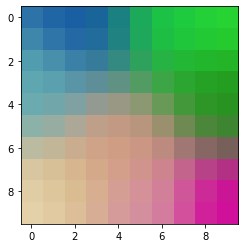

In [12]:
model_name_10x10_100N = response.json()["operation-location"]
model_weights_10x10_100N = download(model_name_10x10_100N)
view(model_weights_10x10_100N)

<h2> NOTE : <i> Around 10 runs were performed for calculating average times indendently (i.e. only single model was trained at a time).
    All of the runs are only for training set of 10 RGB colors with initial learning rate of 0.1.</i> 
</h2>
<p style='color:#FF4500'>
    <b>Dockerised</b> : indicates running the project from docker image as local server.<br>
    <b>Not Dockerised</b> : indicates running the project from command line as local server.
</p>

- How long does this take?
<p style="color:#FF4500">Running this training independantly (i.e. server is only performing this task), it was observed that it takes less than <b>5 seconds</b> to train.</p>

<table style="width:20%;text-align: center">
  <tr>
    <th>Type</th>
    <th>Average Time</th>
  </tr>
  <tr>
    <td>Dockerised</td>
    <td>~ 3-4 seconds</td>
  </tr>
  <tr>
    <td>Dockerised with Vectorisation</td>
    <td style="color:#FF4500">~ 0.2-0.3 seconds</td>
  </tr>
  <tr>
    <td>Not Dockerised</td>
    <td>~ 10 seconds</td>
  </tr>
</table>

- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
<p style='color:#FF4500;'> Influence of training items can been seen on the map where similar colors/shades grouped together towards same area and different colors (RGB values) move away from each other. Since resolution is very low 10X10, the is overlapping of different groups at boundaries. In order to determine more groups (if exists), it is essential to either increase number of iterations or to increase the grid size.</p>

## 2.2 Train a 10x10 network for 200 iterations

In [13]:
payload["max_iterations"] = 200
payload

{'grid_shape': [10, 10],
 'max_iterations': 200,
 'learning_rate': 0.1,
 'training_data': [[0.09803922, 0.78823529, 0.27058824],
  [0.17254902, 0.8745098, 0.18823529],
  [0.82352941, 0.6, 0.49411765],
  [0.83529412, 0.56078431, 0.65098039],
  [0.85098039, 0.74509804, 0.54509804],
  [0.06666667, 0.3254902, 0.63529412],
  [0.1254902, 0.56470588, 0.09411765],
  [0.82352941, 0.00392157, 0.61176471],
  [0.91764706, 0.85882353, 0.70980392],
  [0.38039216, 0.68627451, 0.70980392]],
 'training_data_shape': (10, 3),
 'debug_mode': False,
 'verbose': False}

In [14]:
response = req.post(url=f"{endpoint}/train/", data=json.dumps(payload))
response.content

b'{"message":"Model training has finished and time taken is 0.34 seconds.","operation-location":"07-04-2021_02h30m48sT_10X10_200N_0.1LR"}'

#### Download/View

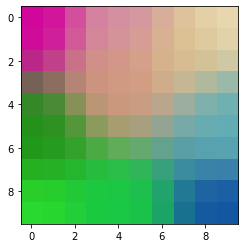

In [15]:
model_name_10x10_200N = response.json()["operation-location"]
model_weights_10x10_200N = download(model_name_10x10_200N)
view(model_weights_10x10_200N)

- How long does this take?
<p style="color:#FF4500">Running this training independantly (i.e. server is only performing this task), it was observed that it takes less than <b>10 seconds</b> to train.</p>

<table style="width:20%;text-align: center">
  <tr>
    <th>Type</th>
    <th>Average Time</th>
  </tr>
   <tr>
    <td>Dockerised</td>
    <td>~ 7.3 seconds</td>
  </tr>
  <tr>
    <td>EDIT: Dockerised with Vectorization</td>
    <td style="color:#FF4500">~ 0.3-0.4 seconds</td>
  </tr>
  <tr>
    <td>Not Dockerised</td>
    <td>~ 20 seconds</td>
  </tr>
</table>

- What does the map look like?
<p style='color:#FF4500;'> The map looks very same as 10x10 100N run with change in absolute positions. A light color is associated with colors that have higher average eucledian distance from BMU. For example, BMU for a green input-training-item have a cluster with the lightest-green being out far. BMU must be at the centre of a particular group, and the more closer a node is to BMU, the more similar/dark the color of node becomes.</p>

## 2.3 Train a 10x10 network for 500 iterations

In [16]:
payload["max_iterations"] = 500
payload

{'grid_shape': [10, 10],
 'max_iterations': 500,
 'learning_rate': 0.1,
 'training_data': [[0.09803922, 0.78823529, 0.27058824],
  [0.17254902, 0.8745098, 0.18823529],
  [0.82352941, 0.6, 0.49411765],
  [0.83529412, 0.56078431, 0.65098039],
  [0.85098039, 0.74509804, 0.54509804],
  [0.06666667, 0.3254902, 0.63529412],
  [0.1254902, 0.56470588, 0.09411765],
  [0.82352941, 0.00392157, 0.61176471],
  [0.91764706, 0.85882353, 0.70980392],
  [0.38039216, 0.68627451, 0.70980392]],
 'training_data_shape': (10, 3),
 'debug_mode': False,
 'verbose': False}

In [17]:
response = req.post(url=f"{endpoint}/train/", data=json.dumps(payload))
response.content

b'{"message":"Model training has finished and time taken is 1.27 seconds.","operation-location":"07-04-2021_02h30m51sT_10X10_500N_0.1LR"}'

#### Download/View

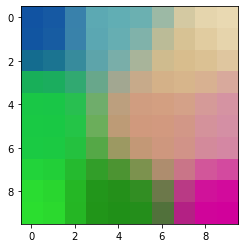

In [18]:
model_name_10x10_500N = response.json()["operation-location"]
model_weights_10x10_500N = download(model_name_10x10_500N)
view(model_weights_10x10_500N)

- How long does this take?

<p style="color:#FF4500">Running this training independantly (i.e. server is only performing this task), it was observed that it takes less than <b>20 seconds</b> to train.</p>

<table style="width:20%;text-align: center">
  <tr>
    <th>Type</th>
    <th>Average Time</th>
  </tr>
  <tr>
    <td>Dockerised</td>
    <td>~ 20 seconds</td>
  </tr>
  <tr>
    <td>EDIT: Dockerised with Vectorization</td>
    <td style="color:#FF4500">~ 1.2 - 1.5 seconds</td>
  </tr>
  <tr>
    <td>Not Dockerised</td>
    <td>~ 35 seconds</td>
  </tr>
</table>


- What does the map look like?
<p style='color:#FF4500;'> Model is better able to move similar group of colours to a area on grid than previous run. With more iterations (500 > 100,200), the algorithm gets more oppurtunities to map the training input to lower dimensions - making a color/node more closer to the BMU.</p>

---

## POST /atrain/ :  Asynchronous Training 
Allows you to train the grid Asynchronously. That means you dont have to wait till the grid completes its training to get REST response. Both ```/train/```, ```/atrain/``` will have ```operation-location``` key:value pair in the response. You can futher use it to download the trained model using ```/download/```

<p style='color:#FF4500;'>Useful and practical for training large grids of sizes of order >= 100X100</p>

## 3. Train a 100x100 network over 1000 iterations

#### Training using the SYNCHRONOUS /train/

In [26]:
payload["grid_shape"] = [100, 100]
payload["max_iterations"] = 1000
response = req.post(url=f"{endpoint}/train/", data=json.dumps(payload))
response.content

b'{"message":"Model training has finished and time taken is 24.75 seconds.","operation-location":"07-04-2021_02h35m51sT_100X100_1000N_0.1LR"}'

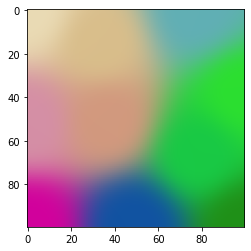

In [27]:
model_name_100x100_1000N = response.json()["operation-location"]
model_weights_100x100_1000N = download(model_name_100x100_1000N)
view(model_weights_100x100_1000N)

# ---

In [19]:
payload["debug_mode"] = False
payload["grid_shape"] = [100, 100]
payload["max_iterations"] = 1000

##### Below are optional settings (default to False) which allow the algorithm to run multiprocessing at various targets mentioned above in optimisation section.

In [20]:
payload["pp_FIND_BMU"] = False
payload["pp_INF_BMU_W"]  = False
payload["pp_INF_BMU_POS"] = False
payload

{'grid_shape': [100, 100],
 'max_iterations': 1000,
 'learning_rate': 0.1,
 'training_data': [[0.09803922, 0.78823529, 0.27058824],
  [0.17254902, 0.8745098, 0.18823529],
  [0.82352941, 0.6, 0.49411765],
  [0.83529412, 0.56078431, 0.65098039],
  [0.85098039, 0.74509804, 0.54509804],
  [0.06666667, 0.3254902, 0.63529412],
  [0.1254902, 0.56470588, 0.09411765],
  [0.82352941, 0.00392157, 0.61176471],
  [0.91764706, 0.85882353, 0.70980392],
  [0.38039216, 0.68627451, 0.70980392]],
 'training_data_shape': (10, 3),
 'debug_mode': False,
 'verbose': False,
 'pp_FIND_BMU': False,
 'pp_INF_BMU_W': False,
 'pp_INF_BMU_POS': False}

#### Training using the ASYNCHRONOUS /atrain/

In [21]:
# POST Request asynchronous
aresponse = req.post(url=f"{endpoint}/atrain/", data=json.dumps(payload))
aresponse_body = aresponse.json()
a_model_name_100X100_1000N = aresponse_body["operation-location"]
print(f"Training for '{a_model_name_100X100_1000N}' has started. You can run below 2-cells to wait and download the model")

Training for '07-04-2021_02h31m11sT_100X100_1000N_0.1LR' has started. You can run below 2-cells to wait and download the model


Since it is asynchronous call, your model might not be trained just yet. So, if you try to download file at ```operation-location```, you will probably receive 404 status code in response.
An approach to would be trying to get the file at regular intervals and when you receive 200 status code in response, you will be downloading the file.

In [22]:
import timeit
import time
async def async_download(model_name, wait_between_calls=20):
    """
    Helper method that faciliates downloading trained model by looking for its saved file
    with time iterval.
    
    Parameters
    ----------
    model_name (operation-location) : str
        The operation location that was provided by API under
        which the model file will be saved.
    
    wait_between_calls : int
        Seconds to wait between each try to download the file from application sever.
    """
    while True:
        download_endpoint = f"{endpoint}/download/{model_name}/"
        response = req.get(url=download_endpoint)
        if response.status_code == 404:
            time.sleep(wait_between_calls)
        elif response.status_code == 200:
            view(response.content)
            break
        else:
            raise Exception("Exception at server.")
            break

#### Execute cell below to wait and try download the model.
<p style='color:#FF4500;'> <b>NOTE:</b> ONLY run cell below, if you have POSTed a asynchronous requests to server to train. The executing of below cell will await for the model to finish train. Otherwise, you can skip it anyway and continue with other cells and come back later to this one (as running this cell is a blocking execution) </p>

Starting to wait for '07-04-2021_02h31m11sT_100X100_1000N_0.1LR' model!
40.14


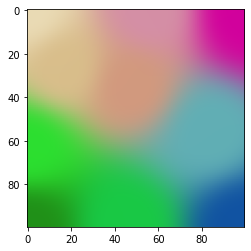

In [23]:
print(f"Starting to wait for '{a_model_name_100X100_1000N}' model!")
start_time =  timeit.default_timer()
await async_download(a_model_name_100X100_1000N)
print("{:.2f}".format(timeit.default_timer() - start_time))

---

## GET /predict/ : To predict similarity from a trained model
Allows to map test input vector to gird nodes i.e. which test input color is closest to which node in the grid.
Returns list of (x,y) coordinates of grid nodes which can be used to plot test input over gird plot for visualising/analysing/labelling test input using a trained model.

In [110]:
def predict(data, my_model_name):
    """
    Examplifies how to send test data for mapping
    it to model using '/predict/' endpoint.
    
    Parameters
    ----------
    data : numpy.array
        Testing items (colors) to be clustered.
    
    my_model_name : str
        Name that identifies model traning.
        This string is retured by /atrain/, /train/ endpoints as `operation-location`
    
    Returns
    -------
    response : json, dict
        Dictionary object containing predicted x,y coordinates (indicies) of grid nodes,
        that are closest to testing item.
    """
    payload = {
        "test_data" : data.tolist(),
        "test_data_shape" : data.shape,
        "model_name" : my_model_name
        }
    response  = req.get(url=f"{endpoint}/predict/", data=json.dumps(payload))
    return response.json()

In [111]:
def plot_predictions(file_bytes:bytes, test_data, predicted_grid_idxs):
    """
    Helper method to plot input data (colours) over trained grid (@weights) using @predicted_grid_idxs.
    For anaylsis, index of input data (individual colors) is also plotted.
    
    Parameters
    ---------
    file_bytes : bytes
        A model's weights file bytes,
        which are response of /download/.
    
    test_data: list, numpy.array 
        Similar to training data, it is list of 3D colors.
    
    predicted_grid_idxs : list
        Response from /predict/ endpoint.
    
    """
    plt.imshow(load_weights(file_bytes))
    indicies = np.array(predicted_grid_idxs)
    y, x = indicies.T
    plt.scatter(x, y, c=test_data, s=40, edgecolors='b')
    for i, _xy in enumerate(predicted_grid_idxs):
        plt.text(_xy[1],_xy[0], i, ha='left', va="top" )
    plt.show()

<label style="color:#FF4500;"> <b>NOTE:</b>You can set ```model_name``` to previous async run's model (```a_model_name_100X100_1000N```).</label> <br>
<label style="color:#FF4500;"> <b>NOTE:</b>You should set it to (```model_name_10x10_500N```) in case you have skipped async training, model has not YET been trainied (how you know? : if you have run the blocking cell ```await asynchronous_download``` and its execution has not yet finished!). </label>

In [112]:
model_name = model_name_10x10_500N 
# model_name = a_model_name_100X100_1000N
model_weights = download(model_name)

In [113]:
# Getting Predictions
print(f"Predicting from {model_name} model.")
response = predict(data_sample, model_name)
predictions = response['predictions']
print(predictions)

Predicting from 29-03-2021_05h09m59sT_10X10_500N_0.1LR model.
[[5, 0], [7, 2], [5, 6], [4, 9], [8, 6], [0, 0], [9, 0], [0, 9], [9, 9], [2, 4]]


### Remember the input?

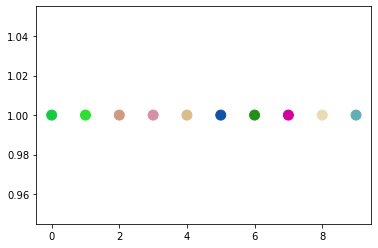

In [114]:
scatter_input_data(data_sample)

#### Testing the imput again on the trained grid.
#### Here the following, I am scattering the same input vector and we can only see the boundaries as the pixel/node color has been matched with input training-item.

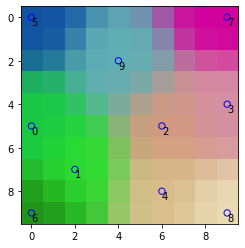

In [115]:
plot_predictions(model_weights, data_sample, predictions)

As assumed before, when input data itself is mapped to the grid via predicting, the BMUs stand straight in the middle of respective cluster.

---
---

# Optimisations

### Rule of Thumb of Optimisations
    
1. Avoided ```for``` loops for manipluating numpy arrays, calculations.
2. Used list comphresenshion instead of ```for``` loop whereever possible.
3. Used numpy vector operations such as ```.multiply```, ```.square```, ```.apply_along_axis``` etc were given more precedance over ```for``` loop.


### What could you do to improve performance?
    
####  Specific optimisations

To improve performance, it was discovered that main target area is executions per iteration. Overall algorithm is in its nature is iterative therefore, following target areas were discovered with possibilities to improve Time Complexity: 
1. Finding BMU node, where all node weights of grid are compared with current input vector. (`pp_FIND_BMU`)
2. Calculating Influence:
	- 2.1 Where all node weights are compared with BMU weights. (`pp_INF_BMU_W`)
	- 2.2 Where all node positions are compared with BMU position. (`pp_INF_BMU_POS`)

<label style='color:#FF4500;'><b>When a function is applied to large numpy array and the function calculations are independant of other elements in array, an intuitive way is to partition the large array into chunks and use multiple processes that utilise (multiple) number of CPU cores available to allocate mapping thus parallelising the computation. Later, combine all the result from each process and pass it over.</b> </label>


### Observations
There are essentially following combinations of parallel processing that be applied.
1. Parallel Run Type-1 : 
    - A. when multiprocessing is ON ONLY at `pp_FIND_BMU`.
    - B. when multiprocessing is ON ONLY at `pp_INF_BMU_W`.
    - C. when multiprocessing is ON ONLY at `pp_INF_BMU_POS`.
2. Parallel Run Type-2 :
    - A. when multiprocessing is ON at both `pp_FIND_BMU` and `pp_INF_BMU_W`.
    - B. when multiprocessing is ON at both `pp_FIND_BMU` and `pp_INF_BMU_POS`.
    - C. when multiprocessing is ON at both `pp_INF_BMU_W` and `pp_INF_BMU_POS`.
3. Parallel Run Type-3 : when multiprocessing is ON at all `pp_FIND_BMU` and `pp_INF_BMU_W` and `pp_INF_BMU_POS`

#### Smaller vs Larger Grid - multiprocessing overhead!
<p style='color:#FF4500;'>It was also found that when any type of multiprocessing is applied while training smaller grids like (10x10=100 nodes for 100N) there is more overhead and significant delay as compared to sequential execution. It was also found that multiprocessing is useful in case of large grids which are of order 100x100 or more.</p>

---

### What does the network look like after 1000 iterations?
<div style='color:#FF4500;'>
    Yes, the network was significantly slower as both resolution of the grid and iterations are increased 10X than first run.
    The input mapped in this higher resolution grid with large iterations, shows clear demarcations of group of classes that exist in input vector. Higher resolution shows intricate relationships among the input feature vectors which makes it much clearer representation than previous low resolution grids.
</div>

### Sequential execution, for case 100X100 1000N.

<table style='width:40%; text-align:center'>
  <tr>
    <th>Type</th>
    <th>Average Time</th>
  </tr>
  <tr>
    <td>Dockerised</td>
    <td>~ 1-1.5 hours with 4-6 seconds per iteration</td>
  </tr>
  <tr>
    <td>EDIT: Dockerised with Vectorization</td>
    <td style="color:#FF4500">~ 24-26 seconds overall </td>
  </tr>
  
  <tr>
    <td>Not Dockerised</td>
    <td>~ 1.5-3 hours with 9-12 seconds per iteration</td>
  </tr>
</table>

### Using ```multiprocessing```, for case 100X100 1000N.

<h4 style='color:#FF4500;'>Dockerised/production envrionment</h4>

<table style='width:60%;text-align: center'>
  <tr>
    <th>Type</th>
    <th>Average Time (Dockerised)</th>
  </tr>
  <tr>
    <td>Parallel Run Type 1 (A) - (pp_FIND_BMU)</td>
    <td style="color:#FF4500">~ 0.9-1 hours</td>
  </tr>
  <tr>
    <td>Parallel Run Type 1 (B) - (pp_INF_BMU_W)</td>
    <td style="color:#FF4500">~ 0.9-1 hours</td>
  </tr> 
   <tr>
    <td>Parallel Run Type 1 (C) - (pp_INF_BMU_POS)</td>
    <td>~ 1-1.2 hours</td>
  </tr>
  <tr>
      <td>-</td>
  </tr>
  <tr>
    <td>Parallel Run Type 2 (A) - (pp_FIND_BMU and pp_INF_BMU_W)</td>
    <td>~ 1.5 hours</td>
  </tr>
  <tr>
    <td>Parallel Run Type 2 (B) - (pp_FIND_BMU and pp_INF_BMU_POS)</td>
    <td>more than 2 hours</td>
  </tr>
  <tr>
    <td>Parallel Run Type 2 (C) - (pp_INF_BMU_W and pp_INF_BMU_POS)</td>
    <td>more than 3 hours</td>
  </tr>
  <tr>
      <td>-</td>
  </tr>
  <tr>
    <td>Parallel Run Type 3 - (pp_FIND_BMU and pp_INF_BMU_W and pp_INF_BMU_POS)</td>
    <td>more than 3 hours</td>
  </tr>
</table>

---

<h2 style='color:#FF4500;'>Conclusion on how to improve efficiency of algorithm </h2>

- NOTE: ```multiprocessing``` used in the project, means the use of python's inbuilt ```multiprocessing``` module, and specifically using ```Pool``` class to divide numerical numpy calculations to CPU cores.
- I found for smaller grids such as 10x10 for x iterations, running the training without using ```multiprocessing``` yeilded quicker results i.e. training sequentially was faster.
- Using ```multiprocessing``` 
    - Total training time during BMU node search (`Parallel Run Type 1 (A) pp_FIND_BMU`) was just shy of an hour (~ 0.95 hours).
    - Similar training time in case of `Parallel Run Type 1 (B) pp_INF_BMU_W` as previous.
    - `Parallel Run Type 1 (C) pp_INF_BMU_POS` took more time than both previous cases.
    - Combination of Type 1 (A, B C) always took more than 1.5 hours
    - Lastly, Type 3, where ```multiprocessing``` was used at each target area, takes more 3 hours to finish.


<label style='color:#FF4500;'><b> Therefore, to improve from 1-1.5 hours sequential training for 100x100 1000N configuration, I would select ```Parallel Run Type 1 (A)``` or ```(B)``` for ```multiprocessing```. The above were tested on Windows i7 4-core Intel processors. If I would have more resources, I would like to test these configuration on different hardware CPU settings and see what results I get.</b></label>

---

### Prospective Improvements

There are other packages that I have read such as ```Dask```, or ```Ray```, which I would like to try and see any improvements than my current approach. I didn't went on to examine further using these two packages, as not recommeded as per the guidelines for this challenge i.e. to only use numpy and python in-built packages.

### Algorithm Time Complexity
Overall algorithm goes through N iterations O(N), but for each iteration it has to compare BMU for O(S) (Point 1) size of nodes and then calculuate influence adding `O(I)`+`O(I)` (Point 2.1 and 2.2) = `O(N* (S+I_1+I_2))` = `O(M^2)` where `M` is highly influenced by size of grid.


<h1 style='color:#FF4500;'>
EDIT : Optimisation :
Dockerised with Vectorization WINS
<h1>



---

# Download/View (Saved) Trained Examples

# 10 x 10 for 100N

In [62]:
model_name = "10X10_100N"

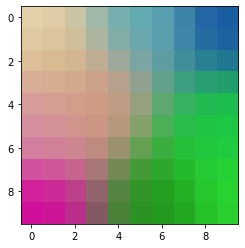

In [63]:
model_weights = download(model_name)
view(model_weights)

# 10 x 10 for 200N

In [64]:
model_name = "10X10_200N"

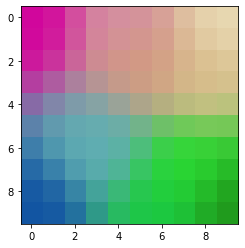

In [65]:
model_weights = download(model_name)
view(model_weights)

# 10 x 10 for 500N

In [66]:
model_name = "10X10_500N"

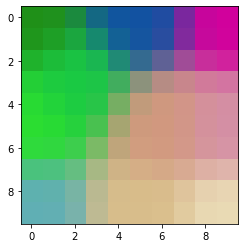

In [67]:
model_weights = download(model_name)
view(model_weights)

# 100 x 100 for 1000N

In [68]:
model_name = "100X100_1000N"

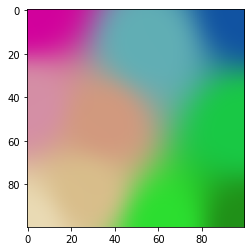

In [69]:
model_weights = download(model_name)
view(model_weights)